#Hands on Neural Network Project: Vizuara AI Labs






**Project 1: Fashion Dataset Sorting (Classification)**

First let's import TensorFlow and Keras.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [ ]:
len(X_valid)

5000

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

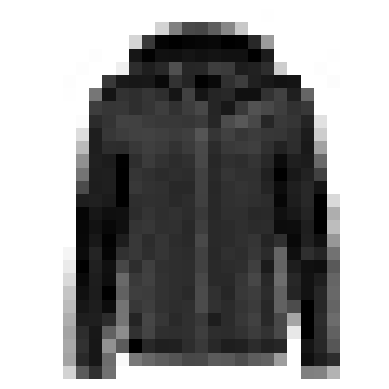

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
len(y_train)

55000

In [ ]:
y_train[0]

4

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [ ]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

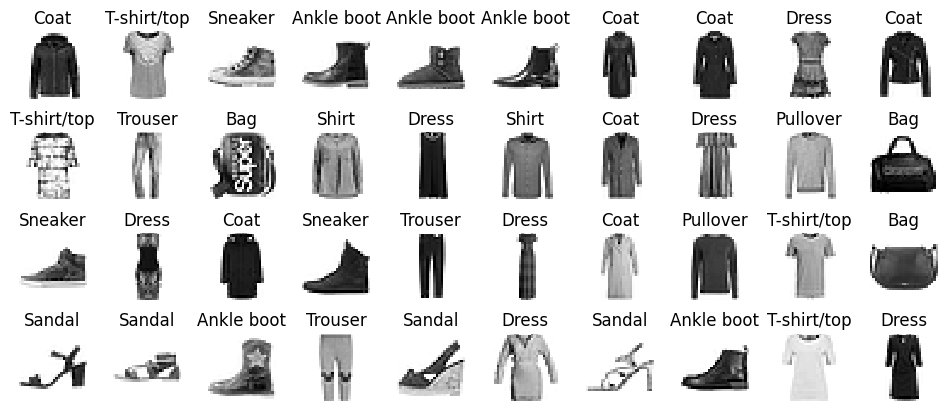

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


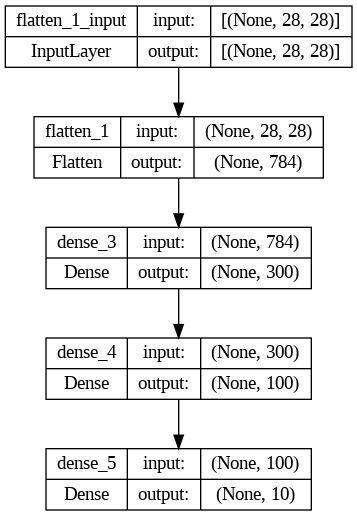

In [ ]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[-0.05547573,  0.05219283, -0.04470842, ..., -0.02091905,
         0.04866538, -0.0612976 ],
       [ 0.04266865, -0.00036068, -0.0105349 , ..., -0.01204414,
        -0.03022664,  0.05148147],
       [ 0.03384251, -0.0720391 ,  0.05055922, ..., -0.01612951,
        -0.00038215, -0.04591045],
       ...,
       [-0.03103632,  0.0478885 , -0.05481826, ..., -0.07233862,
        -0.00248776,  0.07663711],
       [ 0.00146075,  0.07297058,  0.01119053, ...,  0.05733179,
        -0.01813692,  0.05473914],
       [-0.04325661,  0.01617346,  0.00904222, ...,  0.00526305,
         0.07360526, -0.03201197]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([ 5.90005070e-02,  4.31531444e-02,  6.22319765e-02,  1.68837234e-01,
        2.86225956e-02,  3.42372898e-03,  5.87328300e-02,  1.14061490e-01,
        2.72724219e-02,  1.76878348e-02,  3.60301044e-03, -4.41913074e-03,
       -3.94258723e-02, -2.24270560e-02,  7.75107741e-03,  9.39263552e-02,
        6.70164917e-03, -8.50803871e-03, -3.32093611e-02,  1.15495063e-01,
        1.28748953e-01, -1.55473752e-02, -3.53325903e-02,  1.42853096e-01,
        6.36484995e-02,  3.00920624e-02,  3.56051438e-02,  2.53752377e-02,
        6.87333122e-02, -6.55434374e-03,  1.10442236e-01, -5.20356633e-02,
        3.20564583e-02,  8.46019983e-02, -8.89914576e-03, -6.53674006e-02,
        3.66501026e-02,  8.36688196e-05, -7.70378411e-02,  7.68430531e-02,
       -4.75564972e-02,  1.81467682e-01, -9.44086909e-02, -9.19961184e-03,
       -7.08985180e-02,  5.97633272e-02,  8.07300061e-02,  7.73360655e-02,
        4.78499644e-02, -3.84364240e-02,  5.29490374e-02, -1.88413411e-02,
        1.97065789e-02,  

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7158 - accuracy: 0.7671 - val_loss: 0.5137 - val_accuracy: 0.8244
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4862 - accuracy: 0.8301 - val_loss: 0.4392 - val_accuracy: 0.8522
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.4412 - accuracy: 0.8458 - val_loss: 0.5342 - val_accuracy: 0.7998
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4148 - accuracy: 0.8559 - val_loss: 0.3981 - val_accuracy: 0.8662
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3964 - accuracy: 0.8621 - val_loss: 0.3791 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3783 - accuracy: 0.8667 - val_loss: 0.3778 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3664 - accuracy: 0.8714 - val_loss: 0.3674 - val_accuracy

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

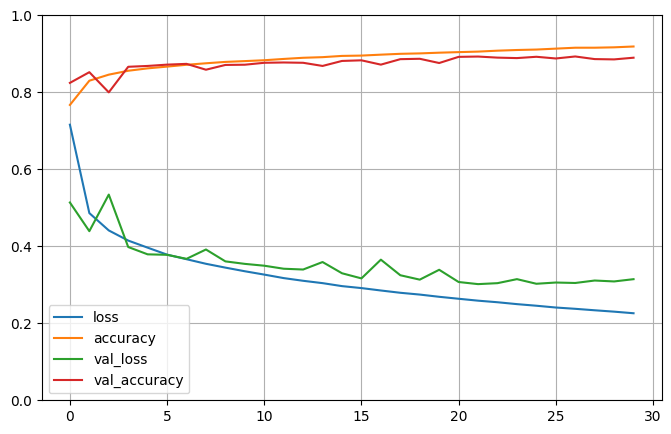

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3446 - accuracy: 0.8784


[0.34455999732017517, 0.8784000277519226]

##TESTING

In [ ]:
X_new = X_test[:3]

**This is how the test data looks like**

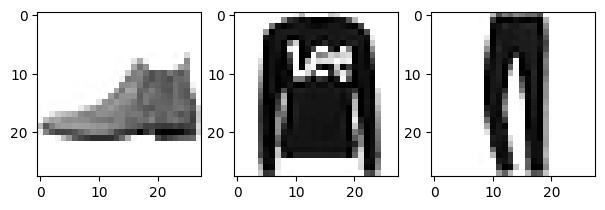

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

**Let's see what our neural network predicts**

In [ ]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 37ms/step


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


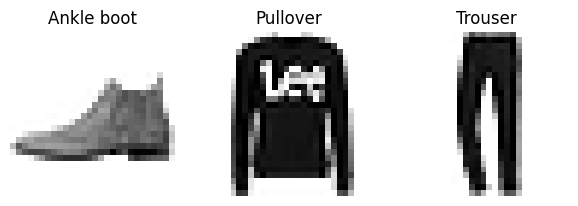

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**Awesome! We obtained perfect results :)**


#Hands on Neural Network Project: Vizuara AI Labs


##Project : California housing price predictor (Regression)

*The 8 input features are the following:*

**MedInc:** median income in block group

**HouseAge:** median house age in block group

**AveRooms:** average number of rooms per household

**AveBedrms:** average number of bedrooms per household

**Population:** block group population

**AveOccup:** average number of household members

**Latitude:** block group latitude

**Longitude:** block group longitude

*The target variable is a scalar: the median house value for California districts, in dollars.*


Let's load, split and scale the California housing dataset:

In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [34]:
len(X_train_full)

15480

In [35]:
len(X_test)

5160

In [36]:
len(X_valid)

3870

In [37]:
len(X_train)

11610

In [40]:
# Convert X_train into a DataFrame with attribute names
df_train = pd.DataFrame(X_train, columns=housing.feature_names)

# Print the DataFrame
print(df_train.head())  # Print the first few rows of the DataFrame


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  3.5214      15.0  3.049945   1.106548      1447.0  1.605993     37.63   
1  5.3275       5.0  6.490060   0.991054      3464.0  3.443340     33.69   
2  3.1000      29.0  7.542373   1.591525      1328.0  2.250847     38.44   
3  7.1736      12.0  6.289003   0.997442      1054.0  2.695652     33.55   
4  2.0549      13.0  5.312457   1.085092      3297.0  2.244384     33.93   

   Longitude  
0    -122.43  
1    -117.39  
2    -122.98  
3    -117.70  
4    -116.93  


Let us standardize the data

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [26]:
len(X_train)

11610

In [27]:
len(X_valid)

3870

In [48]:
np.random.seed(42)
tf.random.set_seed(42)

Let us now define the model architecture

In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.3995 - val_loss: 1.9867
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6861 - val_loss: 0.6335
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6031 - val_loss: 0.5723
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5756 - val_loss: 0.5269
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5526 - val_loss: 0.5069
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5315 - val_loss: 0.4916
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5138 - val_loss: 0.4820
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4988 - val_loss: 0.4607
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4851 - val_loss: 0.4473
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4741 - val_loss: 0.4447

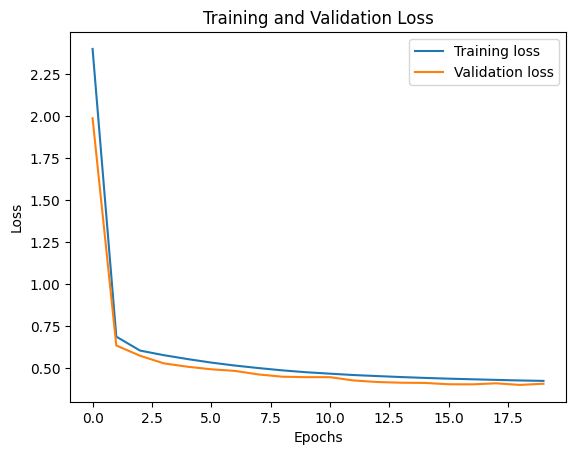

In [50]:
# Plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

Let us evaluate the model testing performance

In [51]:
# Evaluate the model on the test set
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4192


In [31]:

# Make predictions on new data
X_new = X_test[:3]
y_pred = model.predict(X_new)

# Compare predictions with actual values
for i in range(len(X_new)):
    print(f"Sample {i+1}:")
    print(f"Predicted: {y_pred[i][0]}")
    print(f"Actual: {y_test[i]}")

1/1 [==============================] - 0s 61ms/step
Sample 1:
Predicted: 0.7479265332221985
Actual: 0.477
Sample 2:
Predicted: 1.6871938705444336
Actual: 0.458
Sample 3:
Predicted: 3.6486470699310303
Actual: 5.00001
